## Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from pandas import Series
from datetime import datetime
from windrose import WindroseAxes

## Question 1

### Part A

In [13]:
#reading data
data = pd.read_csv('CR1000XSeries_Minute_15.dat_/CR1000XSeries_Minute_15.dat',names=["TIMESTAMP","RECORD","BattV_Avg","BattV_Max","BattV_Min","PTemp_C_Avg","Airtc_Avg","Airtc_Max","Airtc_Min","RH","RH_Max","RH_Min","BP_Avg","BP_Max","BP_TMx","BP_Min","BP_TMn","Rain_mm_Tot","Rain_mm_a","VWC_Avg","EC_Avg","T_Avg","WS_ms_Avg","WindDir","WS_ms_S_WVT","WindDir_D1_WVT","WindDir_SD1_WVT","SlrRad_W_Avg","SensorTemp_Avg"], skiprows=4)
data['date'] = pd.to_datetime(data['TIMESTAMP'])
#making a new dataframe for storing result
result = pd.DataFrame(data['T_Avg'])
result['Relative Humidity'] = data['RH']
result['Pressure'] = data['BP_Avg']
#making Timestamp the index of the dataframe
result = result.set_index(data.date)
result

T_Avg  Relative Humidity  Pressure
date                                                   
2020-12-19 16:00:00  18.51           29.72025     44.21
2020-12-19 16:15:00  18.53           30.49957    751.50
2020-12-19 16:30:00  18.54           32.50576    751.50
2020-12-19 16:45:00  18.52           35.05542    751.50
2020-12-19 17:00:00  18.49           37.58943    751.50
...                    ...                ...       ...
2021-01-22 09:45:00  14.03           97.26331    751.70
2021-01-22 10:00:00  14.06           97.20042    751.70
2021-01-22 10:15:00  14.10           97.19718    752.00
2021-01-22 10:30:00  14.14           97.22563    752.00
2021-01-22 10:45:00  14.19           97.33108    752.00

[3244 rows x 3 columns]

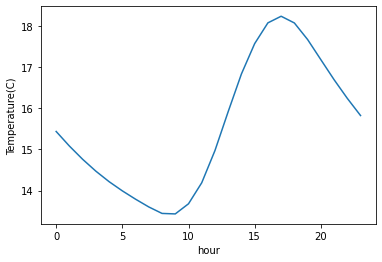

In [13]:
#storing the results to make the data diuranal
result['day'] = result.index.day
result['hour'] = result.index.hour
result_by_day = pd.DataFrame(result.groupby(result.hour).mean())
#plotting the diuranal variation of temperature
plt.ylabel('Temperature(C)')
result_by_day['T_Avg'].plot()

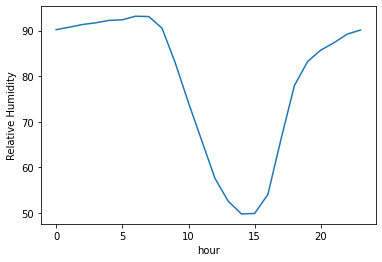

In [14]:
#plotting the diuranal variation of Relative Humidity
plt.ylabel('Relative Humidity')
result_by_day['Relative Humidity'].plot()

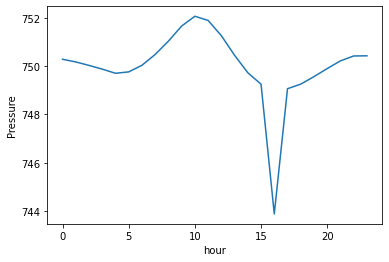

In [15]:
#plotting the diuranal variation of Pressure
plt.ylabel('Pressure')
result_by_day['Pressure'].plot()

### Part B

#### Part 1

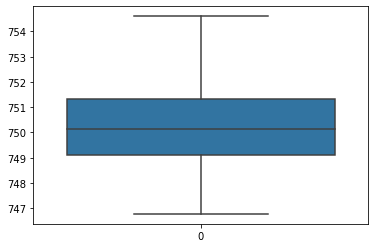

In [31]:
#storing quantiles 
Q1 = result_by_day['Pressure'].quantile(0.25)
Q3 = result_by_day['Pressure'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
#filtering with respec to the temporal mean
filter = (result_by_day['Pressure'] >= Q1 - 1.5 * IQR) & (result_by_day['Pressure'] <= Q3 + 1.5 *IQR)
data_press = result_by_day.loc[filter]
#plotting the boxplot for Pressure
sns.boxplot(data=data_press['Pressure'])

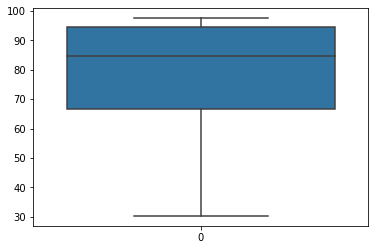

In [32]:
Q1 = result_by_day['Relative Humidity'].quantile(0.25)
Q3 = result_by_day['Relative Humidity'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (result_by_day['Relative Humidity'] >= Q1 - 1.5 * IQR) & (result_by_day['Relative Humidity'] <= Q3 + 1.5 *IQR)
data_press = result_by_day.loc[filter]
#plotting the boxplot for RH
sns.boxplot(data=data_press['Relative Humidity'])

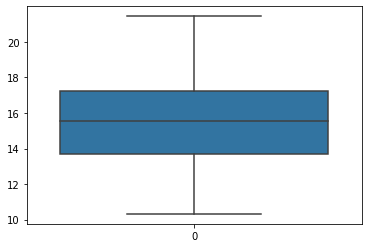

In [75]:
Q1 = result_by_day['T_Avg'].quantile(0.25)
Q3 = result_by_day['T_Avg'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (result_by_day['T_Avg'] >= Q1 - 1.5 * IQR) & (result_by_day['T_Avg'] <= Q3 + 1.5 *IQR)
data_press = result_by_day.loc[filter]
#plotting the boxplot for Temperature
sns.boxplot(data=data_press['T_Avg'])

#### Part 2

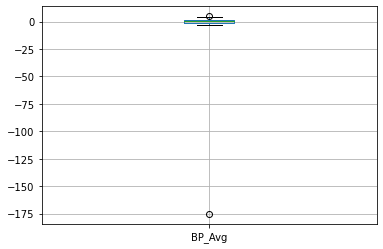

In [21]:
#anamoly detection w.r.t to mean
def D_mean(x):
    return (x-x.mean())
#new dataframe for the given part
df = pd.DataFrame(data[['T_Avg', 'RH', 'BP_Avg' ]])
df = df.set_index(data.date)
#making the data diuranal
df_daily = df.resample('1H').mean()
#calculating anomoly w.r.t the mean
anomaly = pd.DataFrame(df_daily.transform(D_mean))
#plotting
pd.DataFrame(anomaly['BP_Avg']).boxplot()

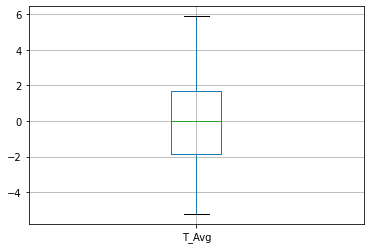

In [22]:
#plotting
pd.DataFrame(anomaly['T_Avg']).boxplot()

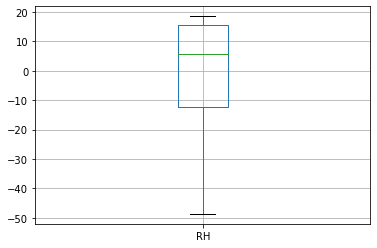

In [23]:
#plotting
pd.DataFrame(anomaly['RH']).boxplot()

#### Part 3

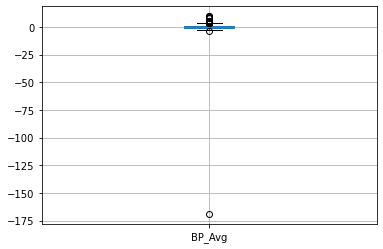

In [25]:
def standardize(x):
    return (x - x.mean())

# Calculate a daily average
df = pd.DataFrame(data[['T_Avg', 'RH', 'BP_Avg' ]])
df = df.set_index(data.date)
df_daily = df.resample('1H').mean()

# Calculate the anomaly for each day
anomaly1 = pd.DataFrame(df_daily.groupby(df_daily.index.day).transform(standardize))
pd.DataFrame(anomaly1['BP_Avg']).boxplot()#plotting

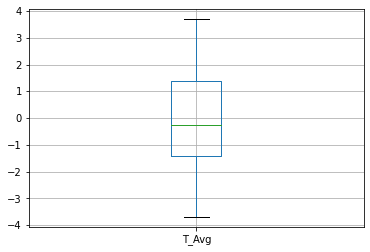

In [26]:
pd.DataFrame(anomaly1['T_Avg']).boxplot()#plotting

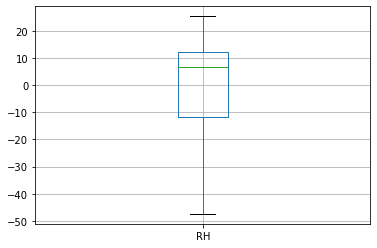

In [27]:
pd.DataFrame(anomaly1['RH']).boxplot()#plotting

### Part C

### Part D

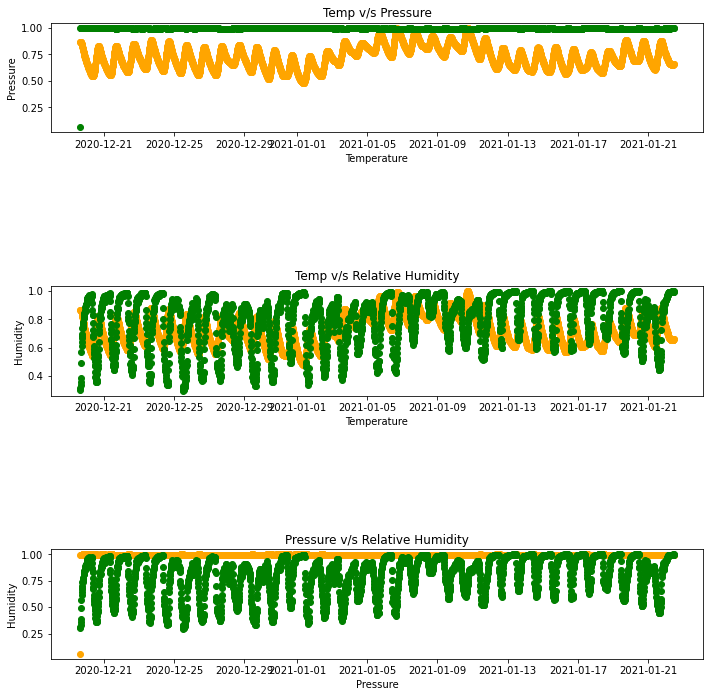

In [26]:
#storing dimensions
a4_dims = (11.7, 11.7)
fig, ax = plt.subplots(figsize=a4_dims)
data['day'] = result.index

#Using subplot to plot the graphs
plt.subplot(5, 1, 1) #the grids define the orientation of the plots
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.scatter(data['day'], data['T_Avg']/data['T_Avg'].max(), label='Temperature', color='orange')
plt.scatter(data['day'], data['BP_Avg']/data['BP_Avg'].max(),label='Pressure', color='green') #defing x and y axis data and normalizing y data
plt.title('Temp v/s Pressure')

#labelling the x-axis and y-axis
plt.xlabel("Temperature")
plt.ylabel("Pressure")
#showing the graphs

plt.subplot(5, 1, 3)
plt.locator_params(nbins=4)
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.scatter(data['day'], data['T_Avg']/data['T_Avg'].max(), label='Temperature', color='orange')
plt.scatter(data['day'], data['RH']/data['RH'].max(),label='Relative Humidity', color='green') #defing x and y axis data and normalizing y data
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.title('Temp v/s Relative Humidity')

plt.subplot(5, 1, 5)
ax.xaxis.set_major_locator(plt.MaxNLocator(3))
plt.scatter(data['day'], data['BP_Avg']/data['BP_Avg'].max(), label='Pressure', color='orange')
plt.scatter(data['day'], data['RH']/data['RH'].max(),label='Relative Humidity', color='green') #defing x and y axis data and normalizing y data
plt.xlabel("Pressure")
plt.ylabel("Humidity")
plt.title('Pressure v/s Relative Humidity')
plt.show()

### Part E

Ans i: Pressure: between 9-10 am
       Temperature: between 3-4 pm
       Relative Humidity: between 5-10 am

Ans ii: 

### Part F

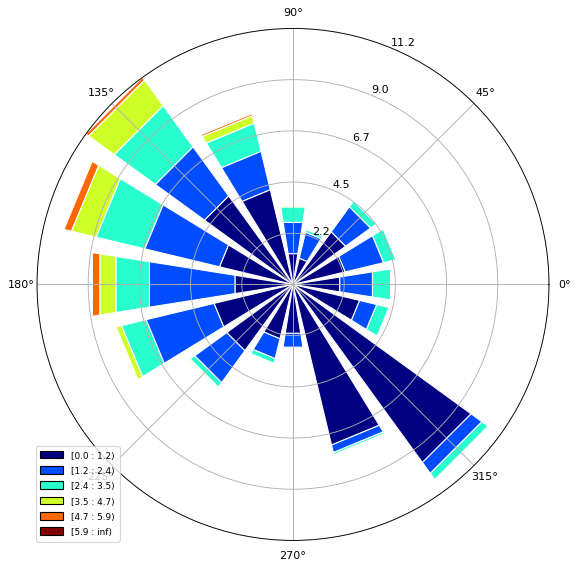

In [4]:
# As seen from the diagram the dominant direction is 135 degree to the device
ax = WindroseAxes.from_ax()
ax.bar(data['WindDir'], data['WS_ms_Avg'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

## Q2